# English Language Literacy Analysis of Fresh Undergraduates in University of Ruhuna

In [1]:
#!pip install TextBlob
#!pip install simpletransformers
!pip install langid

     ---------------------------------------- 1.9/1.9 MB 287.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941179 sha256=1ddd232307fe02b43ad978bc7d336844b9bdc13d75ccbe78e7d01d6c5d1dd73c
  Stored in directory: c:\users\navilog\appdata\local\pip\cache\wheels\50\68\3c\b4aa22e9fad6f19c23a12682bb2d94fc3615b25fe60b84936b
Successfully built langid


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from textblob import TextBlob
import langid

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [5]:
df = pd.read_excel('dataset.xlsx')
df.head()

,Timestamp,Which English development group are you in? [Group A],Which English development group are you in? [Group B],What was your grade in O/L English Language?,What was your grade in A/L General English ?,Have you followed any English Course?,By which medium did you study at O/L?,By which medium did you study at A/L?,How proficient are you in spoken English?,How would you rate your writing skills in English?,How would you rate your English reading skills?,How would you rate your English listening skills?,Was the English Development program presented in a clear and easy-to-understand manner?,We value your opinion and would appreciate your feedback on our English development program. Could you please share your thoughts on how we can improve or what you enjoyed most about the program?,Would you like to join the English Club to sharpen your English literacy?
0,2023-05-26 18:22:19.343,3.0,NaN,A,C,No,English Medium,Sinhala Medium,3,4,4,4,Yes,NaN,Yes
1,2023-05-26 21:46:30.002,4.0,NaN,A,C,No,Sinhala Medium,Sinhala Medium,3,3,4,4,Yes,NaN,Maybe
2,2023-05-26 22:38:12.182,4.0,NaN,A,C,No,Sinhala Medium,Sinhala Medium,3,3,3,3,Yes,NaN,Yes
3,2023-06-06 13:38:05.682,4.0,NaN,B,S,Yes,Sinhala Medium,Sinhala Medium,3,3,3,4,No,NaN,Maybe
4,2023-06-06 13:41:13.197,4.0,NaN,B,C,Yes,Sinhala Medium,Sinhala Medium,3,4,5,4,Yes,NaN,Maybe


In [6]:
df.columns

Index(['Timestamp', 'Which English development group are you in? [Group A]',
       'Which English development group are you in? [Group B]',
       'What was your grade in O/L English Language?',
       'What was your grade in A/L General English ?',
       'Have you followed any English Course?',
       'By which medium did you study at O/L?',
       'By which medium did you study at A/L?',
       'How proficient are you in spoken English?',
       'How would you rate your writing skills in English?',
       'How would you rate your English reading skills?',
       'How would you rate your English listening skills?',
       'Was the English Development program presented in a clear and easy-to-understand manner?',
       'We value your opinion and would appreciate your feedback on our English development program. Could you please share your thoughts on how we can improve or what you enjoyed most about the program?',
       'Would you like to join the English Club to sharpen your Englis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 15 columns):
 #   Column                                                                                                                                                                                               Non-Null Count  Dtype         
---  ------                                                                                                                                                                                               --------------  -----         
 0   Timestamp                                                                                                                                                                                            160 non-null    datetime64[ns]
 1   Which English development group are you in? [Group A]                                                                                                                                          

## Data Cleaning
### Rename columns

In [8]:
new_col_names = {
    'Which English development group are you in? [Group A]': 'en_dev_group_A',
       'Which English development group are you in? [Group B]': 'en_dev_group_B',
       'What was your grade in O/L English Language?': 'OL_grade',
       'What was your grade in A/L General English ?': 'AL_grade',
       'Have you followed any English Course?': 'any_english_course',
       'By which medium did you study at O/L?': 'OL_medium',
       'By which medium did you study at A/L?': 'AL_medium',
       'How proficient are you in spoken English?': 'spoken_prof',
       'How would you rate your writing skills in English?': 'writing_prof',
       'How would you rate your English reading skills?': 'reading_prof',
       'How would you rate your English listening skills?': 'listening_prof',
       'Was the English Development program presented in a clear and easy-to-understand manner?': 'is_en_dev_program_good',
       'We value your opinion and would appreciate your feedback on our English development program. Could you please share your thoughts on how we can improve or what you enjoyed most about the program?': 'student_feedback',
       'Would you like to join the English Club to sharpen your English literacy? ': 'join_english_club'
}

df.rename(columns=new_col_names, inplace=True)

In [9]:
df.head()

,Timestamp,en_dev_group_A,en_dev_group_B,OL_grade,AL_grade,any_english_course,OL_medium,AL_medium,spoken_prof,writing_prof,reading_prof,listening_prof,is_en_dev_program_good,student_feedback,join_english_club
0,2023-05-26 18:22:19.343,3.0,NaN,A,C,No,English Medium,Sinhala Medium,3,4,4,4,Yes,NaN,Yes
1,2023-05-26 21:46:30.002,4.0,NaN,A,C,No,Sinhala Medium,Sinhala Medium,3,3,4,4,Yes,NaN,Maybe
2,2023-05-26 22:38:12.182,4.0,NaN,A,C,No,Sinhala Medium,Sinhala Medium,3,3,3,3,Yes,NaN,Yes
3,2023-06-06 13:38:05.682,4.0,NaN,B,S,Yes,Sinhala Medium,Sinhala Medium,3,3,3,4,No,NaN,Maybe
4,2023-06-06 13:41:13.197,4.0,NaN,B,C,Yes,Sinhala Medium,Sinhala Medium,3,4,5,4,Yes,NaN,Maybe


In [10]:
df['en_dev_group_B'].value_counts()

2.0    21
3.0    17
4.0    13
1.0    11
5.0     9
6.0     6
Name: en_dev_group_B, dtype: int64

In [11]:
df.dtypes

Timestamp                 datetime64[ns]
en_dev_group_A                   float64
en_dev_group_B                   float64
OL_grade                          object
AL_grade                          object
any_english_course                object
OL_medium                         object
AL_medium                         object
spoken_prof                        int64
writing_prof                       int64
reading_prof                       int64
listening_prof                     int64
is_en_dev_program_good            object
student_feedback                  object
join_english_club                 object
dtype: object

### Create a separate single column for English development group

In [12]:
# replace nan values with 0
df['en_dev_group_A'] = df['en_dev_group_A'].fillna(0).astype(int)
df['en_dev_group_B'] = df['en_dev_group_B'].fillna(0).astype(int)

In [13]:
new_col_values = []

for A, B in zip(df['en_dev_group_A'], df['en_dev_group_B']):
    if A > 0:
        new_col_values.append('A-' + str(A))
    if B > 0:
        new_col_values.append('B-' + str(B))

len(new_col_values)

160

In [14]:
df['en_dev_group'] = new_col_values

In [15]:
df.drop(['en_dev_group_A', 'en_dev_group_B'], axis=1, inplace=True)

In [16]:
df

,Timestamp,OL_grade,AL_grade,any_english_course,OL_medium,AL_medium,spoken_prof,writing_prof,reading_prof,listening_prof,is_en_dev_program_good,student_feedback,join_english_club,en_dev_group
0,2023-05-26 18:22:19.343,A,C,No,English Medium,Sinhala Medium,3,4,4,4,Yes,NaN,Yes,A-3
1,2023-05-26 21:46:30.002,A,C,No,Sinhala Medium,Sinhala Medium,3,3,4,4,Yes,NaN,Maybe,A-4
2,2023-05-26 22:38:12.182,A,C,No,Sinhala Medium,Sinhala Medium,3,3,3,3,Yes,NaN,Yes,A-4
3,2023-06-06 13:38:05.682,B,S,Yes,Sinhala Medium,Sinhala Medium,3,3,3,4,No,NaN,Maybe,A-4
4,2023-06-06 13:41:13.197,B,C,Yes,Sinhala Medium,Sinhala Medium,3,4,5,4,Yes,NaN,Maybe,A-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2023-06-27 09:17:57.552,A,A,Yes,English Medium,Sinhala Medium,4,5,5,5,Yes,NaN,Maybe,B-1
156,2023-06-27 09:18:33.700,B,C,Yes,Sinhala Medium,Sinhala Medium,3,3,3,3,Yes,NaN,Yes,B-4
157,2023-06-27 09:20:06.024,A,B,Yes,Sinhala Medium,Sinhala Medium,4,4,4,4,Yes,NaN,Yes,B-2
158,2023-06-27 09:20:36.913,A,B,Yes,Sinhala Medium,Sinhala Medium,4,4,4,4,Yes,NaN,Yes,A-2


### Column description
1. **Timestamp** - The time that the entry was made.
2. **OL_grade** - What was your grade in O/L English Language?
3. **AL_grade** - What was your grade in A/L General English ?
4. **any_english_course** - Have you followed any English Course?
5. **OL_medium** - By which medium did you study at O/L?
6. **AL_medium** - By which medium did you study at A/L?
7. **spoken_prof** - How proficient are you in spoken English?
8. **writing_prof** - How would you rate your writing skills in English?
9. **reading_prof** - How would you rate your English reading skills?
10. **listening_prof** - How would you rate your English listening skills?
11. **is_en_dev_program_good** - Was the English Development program presented in a clear and easy-to-understand manner?
12. **student_feedback** - We value your opinion and would appreciate your feedback on our English development program. Could you please share your thoughts on how we can improve or what you enjoyed most about the program?
13. **join_english_club** - Would you like to join the English Club to sharpen your English literacy?
14. **en_dev_group** - English development group

In [17]:
df['Timestamp'].duplicated().sum()

0

In [18]:
df.set_index('Timestamp', inplace=True)

In [19]:
df.isna().sum()

OL_grade                    0
AL_grade                    0
any_english_course          0
OL_medium                   0
AL_medium                   0
spoken_prof                 0
writing_prof                0
reading_prof                0
listening_prof              0
is_en_dev_program_good      0
student_feedback          125
join_english_club           3
en_dev_group                0
dtype: int64

In [20]:
df['student_feedback'] = df['student_feedback'].fillna('no comment')

In [21]:
df['join_english_club'] = df['join_english_club'].fillna('no comment')

In [22]:
df.isna().sum()

OL_grade                  0
AL_grade                  0
any_english_course        0
OL_medium                 0
AL_medium                 0
spoken_prof               0
writing_prof              0
reading_prof              0
listening_prof            0
is_en_dev_program_good    0
student_feedback          0
join_english_club         0
en_dev_group              0
dtype: int64

In [23]:
df

,OL_grade,AL_grade,any_english_course,OL_medium,AL_medium,spoken_prof,writing_prof,reading_prof,listening_prof,is_en_dev_program_good,student_feedback,join_english_club,en_dev_group
Timestamp,,,,,,,,,,,,,
2023-05-26 18:22:19.343,A,C,No,English Medium,Sinhala Medium,3,4,4,4,Yes,no comment,Yes,A-3
2023-05-26 21:46:30.002,A,C,No,Sinhala Medium,Sinhala Medium,3,3,4,4,Yes,no comment,Maybe,A-4
2023-05-26 22:38:12.182,A,C,No,Sinhala Medium,Sinhala Medium,3,3,3,3,Yes,no comment,Yes,A-4
2023-06-06 13:38:05.682,B,S,Yes,Sinhala Medium,Sinhala Medium,3,3,3,4,No,no comment,Maybe,A-4
2023-06-06 13:41:13.197,B,C,Yes,Sinhala Medium,Sinhala Medium,3,4,5,4,Yes,no comment,Maybe,A-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-27 09:17:57.552,A,A,Yes,English Medium,Sinhala Medium,4,5,5,5,Yes,no comment,Maybe,B-1
2023-06-27 09:18:33.700,B,C,Yes,Sinhala Medium,Sinhala Medium,3,3,3,3,Yes,no comment,Yes,B-4
2023-06-27 09:20:06.024,A,B,Yes,Sinhala Medium,Sinhala Medium,4,4,4,4,Yes,no comment,Yes,B-2


In [24]:
df['listening_prof'].value_counts()

4    71
3    51
2    20
5    12
1     6
Name: listening_prof, dtype: int64

### Create common feature for English proficiency Score
The idea behind this score is to create a single column for english proficiency of students. Following dictionary explains how we calculate respective score.

In [70]:
edu_score_dict = {
    'OL_grade': {
        'A': 5, 'B': 4, 'C': 2, 'S': 1, 'W': 0
    },
    
    'AL_grade': {
        'A': 5, 'B': 4, 'C': 2, 'S': 1, 'W': 0
    },
    
    'any_english_course': {
        'Yes': 1, 'No': 0
    },
    
    'OL_medium': {
        'English Medium': 1, 'Sinhala Medium': 0, 'Tamil Medium': 0
    },
    
    'AL_medium': {
        'English Medium': 1, 'Sinhala Medium': 0, 'Tamil Medium': 0
    },
    
    'spoken_prof': [0, 1, 2, 3, 4, 5],
    'writing_prof': [0, 1, 2, 3, 4, 5],
    'reading_prof': [0, 1, 2, 3, 4, 5],
    'listening_prof': [0, 1, 2, 3, 4, 5],
}

edu_score = []

edu_score_df = df.loc[:, 'OL_grade':'listening_prof']
edu_proficiency_df = df.loc[:, 'spoken_prof':'listening_prof']

for ind in edu_score_df.index:
    edu_score_val = 0;
    edu_records = edu_score_df.loc[ind, :]
    edu_record_cols = edu_records.index
    #print(edu_records.index)
    for edu_record in edu_record_cols:
        edu_record_val = edu_records[edu_record]
        #print(edu_score_dict[edu_record][edu_record_val])
        edu_score_val += edu_score_dict[edu_record][edu_record_val]
        
    # categorize into levels
    prof_level = 0
    if edu_score_val >= 0 and edu_score_val <= 5:
        prof_level = 0 # Beginner/Poor
    elif edu_score_val >= 6 and edu_score_val <= 15:
        prof_level = 1 # Intermediate
    elif edu_score_val >= 16 and edu_score_val <= 25:
        prof_level = 2 # Good
    else:
        prof_level = 3 # expert
        
    edu_score.append(prof_level)
    
len(edu_score)

160

In [65]:
#df.drop('en_score', axis = 1)
df['en_prof_level'] = edu_score

In [67]:
df['en_prof_level'].value_counts()

2    107
3     30
1     22
0      1
Name: en_prof_level, dtype: int64

### GCE A/L and O/L English Grades, Medium and Proficiency

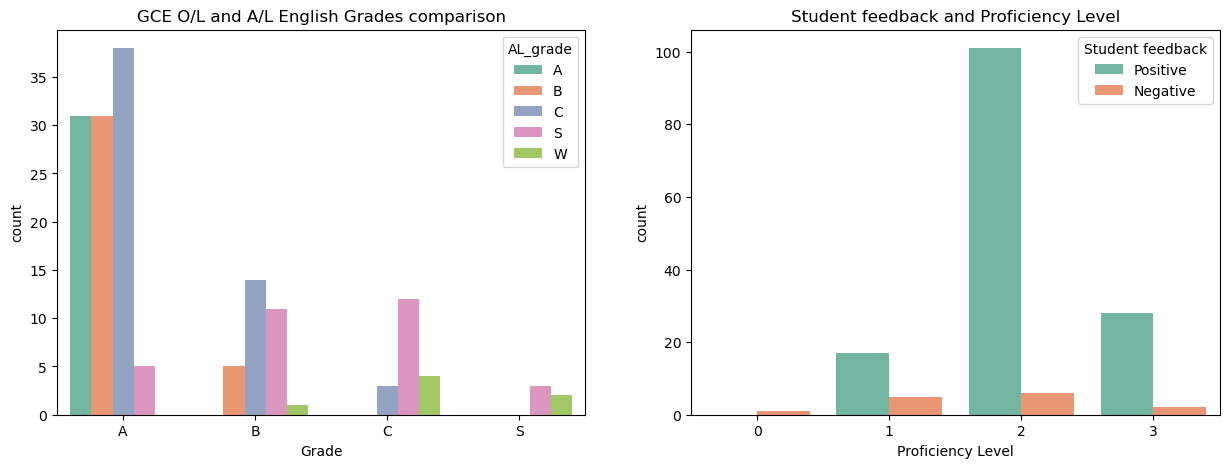

In [73]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='OL_grade', palette='Set2', order=['A', 'B', 'C', 'S'], hue='AL_grade', hue_order=['A', 'B', 'C', 'S', 'W'])
plt.title('GCE O/L and A/L English Grades comparison')
plt.xlabel('Grade')
#plt.legend(title='Student feedback', labels=['Positive', 'Negative'])

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='en_prof_level', palette='Set2', hue='is_en_dev_program_good', hue_order=['Yes', 'No'])
plt.title('Student feedback and Proficiency Level')
plt.xlabel('Proficiency Level')
plt.legend(title='Student feedback', labels=['Positive', 'Negative'])

# plt.subplot(2, 4, 3)
# sns.countplot(data=df, x='OL_medium', palette='Set2', hue='is_en_dev_program_good', order=['Sinhala Medium', 'English Medium', 'Tamil Medium'], hue_order=['Yes', 'No'])
# plt.title('GCE Ordinary Level Medium')
# plt.xlabel('Medium')
# plt.xticks(ticks=[0, 1, 2], labels=['Sinala', 'English', 'Tamil'])
# plt.legend(title='Student feedback', labels=['Positive', 'Negative'])

# plt.subplot(2, 4, 4)
# sns.countplot(data=df, x='AL_medium', palette='Set2', hue='is_en_dev_program_good', order=['Sinhala Medium', 'English Medium', 'Tamil Medium'], hue_order=['Yes', 'No'])
# plt.title('GCE Advanced Level Medium')
# plt.xlabel('Medium')
# plt.xticks(ticks=[0, 1, 2], labels=['Sinala', 'English', 'Tamil'])
# plt.legend(title='Student feedback', labels=['Positive', 'Negative'])

# plt.subplot(2, 4, 5)
# sns.countplot(data=df, x='spoken_prof', palette='Set2', hue='OL_grade', hue_order=['A', 'B', 'C', 'S'])
# plt.title('Spoken Proficiency')
# plt.xlabel('Proficiency Level')
# plt.legend(title='O/L Grade')

# plt.subplot(2, 4, 6)
# sns.countplot(data=df, x='writing_prof', palette='Set2', hue='OL_grade', hue_order=['A', 'B', 'C', 'S'])
# plt.title('Writing Proficiency')
# plt.xlabel('Proficiency Level')
# plt.legend(title='O/L Grade')

# plt.subplot(2, 4, 7)
# sns.countplot(data=df, x='reading_prof', palette='Set2', hue='OL_grade', hue_order=['A', 'B', 'C', 'S'])
# plt.title('Reading Proficiency')
# plt.xlabel('Proficiency Level')
# plt.legend(title='O/L Grade')

# plt.subplot(2, 4, 8)
# sns.countplot(data=df, x='listening_prof', palette='Set2', hue='OL_grade', hue_order=['A', 'B', 'C', 'S'])
# plt.title('Listening Proficiency')
# plt.xlabel('Proficiency Level')
# plt.legend(title='O/L Grade')

plt.show()

## English Proficiency Distribution

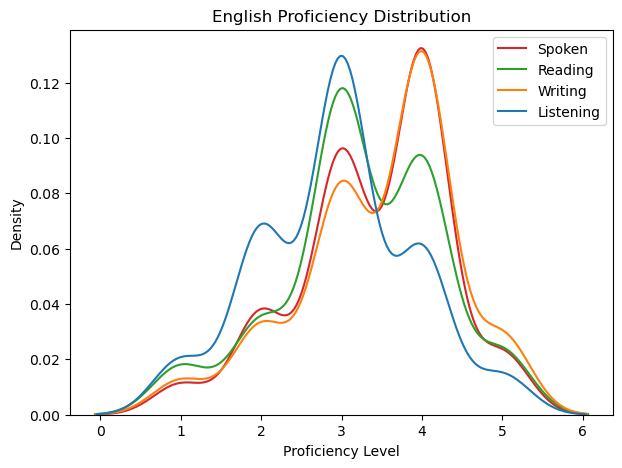

In [74]:
proficiency_list = [df['spoken_prof'], df['reading_prof'], df['writing_prof'], df['listening_prof']]

plt.figure(figsize=(7, 5))
sns.kdeplot(proficiency_list)
plt.title('English Proficiency Distribution')
plt.xlabel('Proficiency Level')
plt.legend(labels=['Spoken', 'Reading', 'Writing', 'Listening'])

plt.show()

## Student Feedback

In [75]:
df['is_en_dev_program_good'].value_counts()

Yes    146
No      14
Name: is_en_dev_program_good, dtype: int64

In [76]:
df['join_english_club'].value_counts()

Yes           96
Maybe         55
No             6
no comment     3
Name: join_english_club, dtype: int64

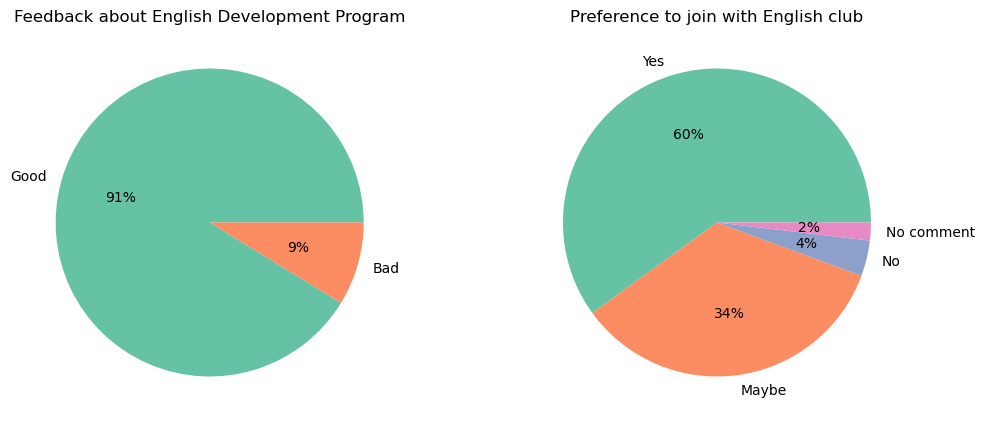

In [77]:
colors = sns.color_palette('Set2')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(df['is_en_dev_program_good'].value_counts(), labels=['Good', 'Bad'], colors=colors, autopct='%.0f%%')
plt.title('Feedback about English Development Program')

plt.subplot(1, 2, 2)
plt.pie(df['join_english_club'].value_counts(), labels=['Yes', 'Maybe', 'No', 'No comment'], colors=colors, autopct='%.0f%%')
plt.title('Preference to join with English club')

plt.show()

In [78]:
df['en_dev_group'].value_counts()

A-3    21
B-2    21
A-4    18
B-3    17
A-1    17
B-4    13
A-2    12
B-1    11
B-5     9
A-5     8
A-6     7
B-6     6
Name: en_dev_group, dtype: int64

In [79]:
list(np.sort(df['en_dev_group'].unique()))

['A-1',
 'A-2',
 'A-3',
 'A-4',
 'A-5',
 'A-6',
 'B-1',
 'B-2',
 'B-3',
 'B-4',
 'B-5',
 'B-6']

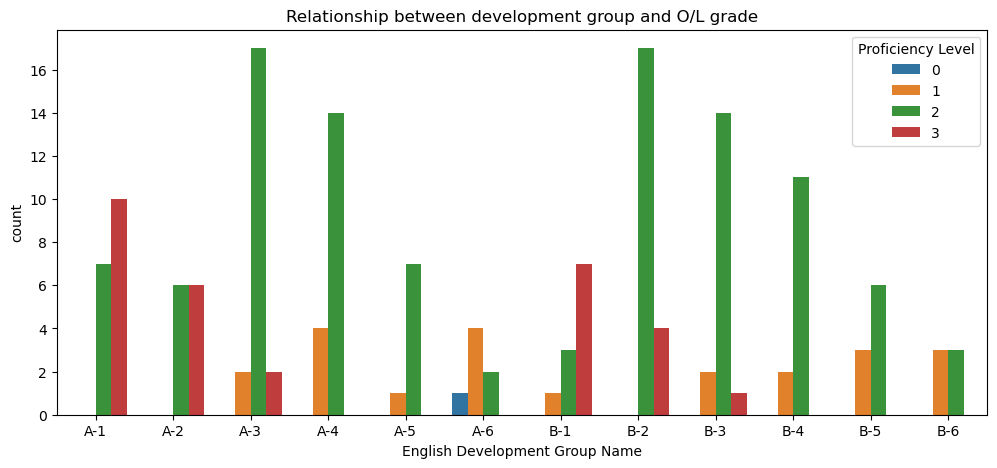

In [80]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='en_dev_group', order=list(np.sort(df['en_dev_group'].unique())), hue='en_prof_level')
plt.title('Relationship between development group and O/L grade')
plt.legend(title='Proficiency Level')
plt.xticks(ticks=np.arange(0, 12), labels=list(np.sort(df['en_dev_group'].unique())))
plt.xlabel('English Development Group Name')
plt.show()

In [81]:
df[df['student_feedback'] == 'no comment']

,OL_grade,AL_grade,any_english_course,OL_medium,AL_medium,spoken_prof,writing_prof,reading_prof,listening_prof,is_en_dev_program_good,student_feedback,join_english_club,en_dev_group,en_score,en_prof_level
Timestamp,,,,,,,,,,,,,,,
2023-05-26 18:22:19.343,A,C,No,English Medium,Sinhala Medium,3,4,4,4,Yes,no comment,Yes,A-3,23,2
2023-05-26 21:46:30.002,A,C,No,Sinhala Medium,Sinhala Medium,3,3,4,4,Yes,no comment,Maybe,A-4,21,2
2023-05-26 22:38:12.182,A,C,No,Sinhala Medium,Sinhala Medium,3,3,3,3,Yes,no comment,Yes,A-4,19,2
2023-06-06 13:38:05.682,B,S,Yes,Sinhala Medium,Sinhala Medium,3,3,3,4,No,no comment,Maybe,A-4,19,2
2023-06-06 13:41:13.197,B,C,Yes,Sinhala Medium,Sinhala Medium,3,4,5,4,Yes,no comment,Maybe,A-4,23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-27 09:17:57.552,A,A,Yes,English Medium,Sinhala Medium,4,5,5,5,Yes,no comment,Maybe,B-1,31,3
2023-06-27 09:18:33.700,B,C,Yes,Sinhala Medium,Sinhala Medium,3,3,3,3,Yes,no comment,Yes,B-4,19,2
2023-06-27 09:20:06.024,A,B,Yes,Sinhala Medium,Sinhala Medium,4,4,4,4,Yes,no comment,Yes,B-2,26,3


### Sentiment Analysis
Sentiment Analysis is a use case of Natural Language Processing (NLP) and comes under the category of text classification. To put it simply, Sentiment Analysis involves classifying a text into various sentiments, such as positive or negative, Happy, Sad or Neutral, etc. Thus, the ultimate goal of sentiment analysis is to decipher the underlying mood, emotion, or sentiment of a text. This is also known as Opinion Mining.

Since student comments are not too complex, in this project we are suing *'TextBlob'* python library.

In the dataset, we have noticed that some students have commented using languages other than English. **That might be a indecation of lack of confidence.**

Therefore we have categorized those comments into a separate category and do some alanysis on them. For language detection we have used *langid* python library.

In [82]:
# filter-out all actual comments
sentiments = {}
sentiment_cat = []
comment_language = []

student_comments = df['student_feedback']
for comment in student_comments:
    sentiment_text = 'no comment'
    
    if comment != 'no comment':
        
        blob = TextBlob(comment)
        sentiment = blob.sentiment
        
        if sentiment.polarity > 0:
            sentiment_text = 'Positive'            
        elif sentiment.polarity < 0:
            sentiment_text = 'Negative'            
        else:
            sentiment_text = 'Natural'            

        sentiments[comment] = sentiment_text
        
    sentiment_cat.append(sentiment_text)
    
    # language detection
    if comment != 'no comment':
        detected_language, confidence = langid.classify(comment)
        #print(comment, detected_language, confidence)
        comment_language.append(int(detected_language == 'en'))
    else:
        comment_language.append(-1)

df['sentiment'] = sentiment_cat
df['is_comment_in_en'] = comment_language
sentiments

{'I enjoyed most the interactive sessions ': 'Positive',
 'Actually English Program is well organized.Specially practical group activities are so useful.': 'Positive',
 'Very good': 'Positive',
 'The fear of speaking in front of a group decreased, and the ability to speak increased': 'Negative',
 'Pointing students to speak seems to be uncomfortable ': 'Negative',
 'I enjoyed the speaking activities most.': 'Positive',
 'Its valuble for us to do some more english activities and entertaining things ': 'Positive',
 'It is easy to understand if it is conduct in bilingual medium': 'Positive',
 'No suggestion .': 'Natural',
 'සිංහල මාධ්\u200dයයේන් පැහැදිලි නොකරයි': 'Natural',
 'Not bad ': 'Positive',
 'The teachers teach very well, it is useful to divide the parts so that all aspects are covered. Having more time for speaking is sufficient to some extent.': 'Positive',
 'We can improve our skills': 'Natural',
 'Interactive sessions were great. But the program would be much better if they di

In [83]:
df.head()

,OL_grade,AL_grade,any_english_course,OL_medium,AL_medium,spoken_prof,writing_prof,reading_prof,listening_prof,is_en_dev_program_good,student_feedback,join_english_club,en_dev_group,en_score,en_prof_level,sentiment,is_comment_in_en
Timestamp,,,,,,,,,,,,,,,,,
2023-05-26 18:22:19.343,A,C,No,English Medium,Sinhala Medium,3,4,4,4,Yes,no comment,Yes,A-3,23,2,no comment,-1
2023-05-26 21:46:30.002,A,C,No,Sinhala Medium,Sinhala Medium,3,3,4,4,Yes,no comment,Maybe,A-4,21,2,no comment,-1
2023-05-26 22:38:12.182,A,C,No,Sinhala Medium,Sinhala Medium,3,3,3,3,Yes,no comment,Yes,A-4,19,2,no comment,-1
2023-06-06 13:38:05.682,B,S,Yes,Sinhala Medium,Sinhala Medium,3,3,3,4,No,no comment,Maybe,A-4,19,2,no comment,-1
2023-06-06 13:41:13.197,B,C,Yes,Sinhala Medium,Sinhala Medium,3,4,5,4,Yes,no comment,Maybe,A-4,23,2,no comment,-1


In [84]:
df['sentiment'].value_counts()

no comment    125
Positive       19
Natural        13
Negative        3
Name: sentiment, dtype: int64

In [85]:
df['is_comment_in_en'].value_counts()

-1    125
 1     32
 0      3
Name: is_comment_in_en, dtype: int64

In [86]:
commented_language_df = df[df['is_comment_in_en'] > -1]
commented_language_df['is_comment_in_en'].value_counts()

1    32
0     3
Name: is_comment_in_en, dtype: int64

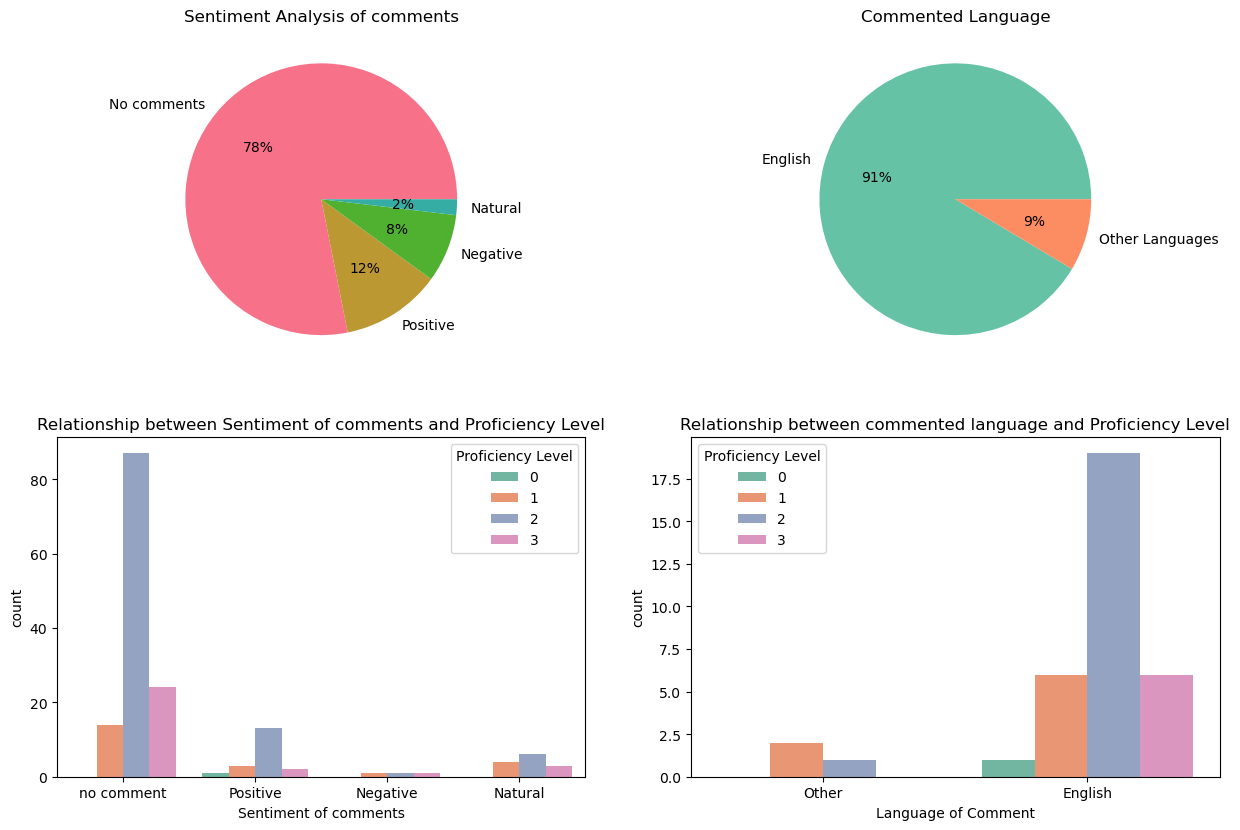

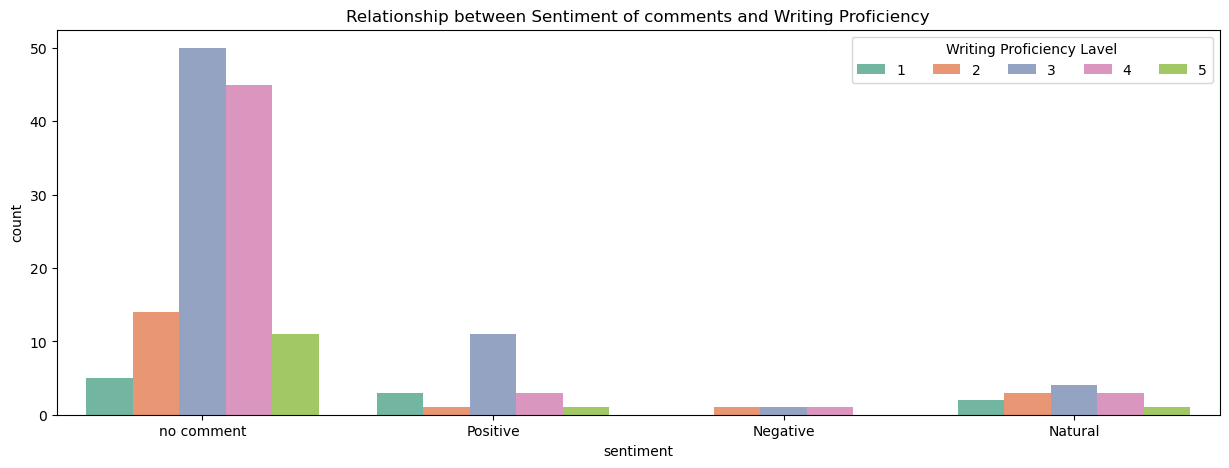

In [88]:
colors = sns.color_palette("husl")
colors2 = sns.color_palette("Set2")

plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.pie(df['sentiment'].value_counts(), labels=['No comments', 'Positive', 'Negative', 'Natural'], colors=colors, autopct='%.0f%%')
plt.title('Sentiment Analysis of comments')

plt.subplot(3, 2, 2)
plt.pie(commented_language_df['is_comment_in_en'].value_counts(), labels=['English', 'Other Languages'], colors=colors2, autopct='%.0f%%')
plt.title('Commented Language')

plt.subplot(3, 2, 3)
sns.countplot(df, x='sentiment', hue='en_prof_level', palette=colors2)
plt.title('Relationship between Sentiment of comments and Proficiency Level')
plt.xlabel('Sentiment of comments')
plt.legend(title='Proficiency Level')

plt.subplot(3, 2, 4)
sns.countplot(commented_language_df, x='is_comment_in_en', hue='en_prof_level', palette=colors2)
plt.title('Relationship between commented language and Proficiency Level')
plt.xlabel('Language of Comment')
plt.legend(title='Proficiency Level')
plt.xticks(ticks=[0, 1], labels=['Other', 'English'])
plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(df, x='sentiment', hue='writing_prof', palette=colors2)
plt.title('Relationship between Sentiment of comments and Writing Proficiency')
plt.legend(title='Writing Proficiency Lavel', ncol=5)

plt.show()

**NB:** Sentiment Analysis is dependent on the quality of language used in comments. Therefore, some comments can be makred as Naturel or Negative even though they are intended to present a positive feedback. Ex: very short comments usually consider as Natural comments.
#### Observations:
1. Even though they have a good knowledge in English (based on GCE OL grade), majority of them has not providd any comment.
2. Positive and Negative comment percentage is very similar. (Positive - 12%, Negative - 8%)
3. We can considar above graphs as a representation of the **confidence** of presenting ideas in English to the public.

In [60]:
df.to_csv('en_literacy_clean.csv')